In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#from tensorflow.keras.applications.mobilenet_v3 import MobileNetV3
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19

2022-12-15 08:40:07.191412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 08:40:15.359782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-15 08:40:15.359833: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-15 08:40:15.391497: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-15 08:40:17.663397: W tensorflow/stream_executor/pla

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '../input/plant-disease/dataset/train'
valid_path = '../input/plant-disease/dataset/test'


In [3]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2022-12-15 08:40:27.431510: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-15 08:40:27.431555: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-15 08:40:27.431583: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9333e3489cbe): /proc/driver/nvidia/version does not exist
2022-12-15 08:40:27.431876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


80134624/80134624 [==============================] - 0s 0us/step


In [4]:
for layer in vgg19.layers:
    layer.trainable = False

In [5]:
folders = glob('../input/plant-disease/dataset/train/*')

In [6]:
x = Flatten()(vgg19.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)

In [8]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('../input/plant-disease/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 class_mode = 'categorical')

Found 43456 images belonging to 38 classes.


In [12]:
test_set = test_datagen.flow_from_directory('../input/plant-disease/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 10849 images belonging to 38 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_12/4039646700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
870/870 [==============================] - 1416s 2s/step - loss: 0.7099 - accuracy: 0.8074 - val_loss: 0.4710 - val_accuracy: 0.8805
Epoch 2/20
870/870 [==============================] - 1285s 1s/step - loss: 0.3823 - accuracy: 0.8927 - val_loss: 0.3069 - val_accuracy: 0.9104
Epoch 3/20
870/870 [==============================] - 1283s 1s/step - loss: 0.3345 - accuracy: 0.9086 - val_loss: 0.3668 - val_accuracy: 0.9054
Epoch 4/20
870/870 [==============================] - 1281s 1s/step - loss: 0.3046 - accuracy: 0.9185 - val_loss: 0.3999 - val_accuracy: 0.9058
Epoch 5/20
870/870 [==============================] - 1285s 1s/step - loss: 0.2775 - accuracy: 0.9282 - val_loss: 0.3609 - val_accuracy: 0.9173
Epoch 6/20
870/870 [==============================] - 1287s 1s/step - loss: 0.2884 - accuracy: 0.9292 - val_loss: 0.4181 - val_accuracy: 0.9113
Epoch 7/20
870/870 [==============================] - 1292s 1s/step - loss: 0.2649 - accuracy: 0.9363 - val_loss: 0.4510 - val_accuracy:

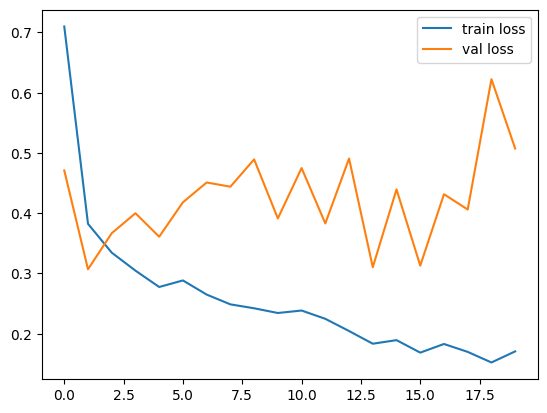

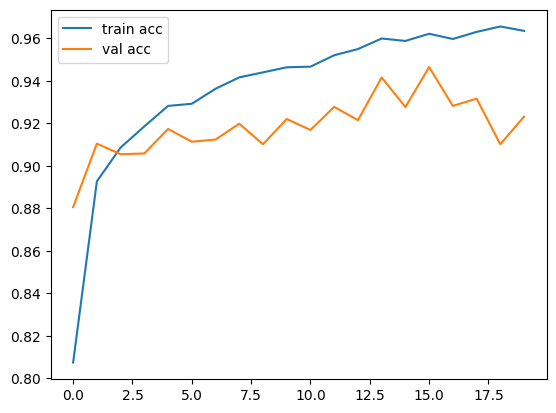

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

model.save('/kaggle/working/vgg16model.h5')

In [16]:

y_pred = model.predict(test_set)


217/217 [==============================] - 230s 1s/step


In [17]:
y_pred

array([[8.56846300e-16, 8.88821580e-28, 2.96146462e-23, ...,
        2.21734252e-14, 3.93275565e-32, 3.42882486e-05],
       [1.62304913e-22, 1.47514942e-38, 2.73587406e-29, ...,
        1.83117419e-30, 9.84101654e-32, 8.21457377e-25],
       [1.13291606e-25, 1.12518274e-29, 1.86885200e-34, ...,
        4.72328309e-22, 8.97255673e-29, 3.93020640e-24],
       ...,
       [1.32962774e-33, 0.00000000e+00, 5.43510408e-30, ...,
        9.99999940e-01, 1.24410612e-24, 2.46115656e-29],
       [1.91544385e-13, 3.32644500e-23, 1.30005633e-26, ...,
        6.03230573e-14, 1.01553300e-26, 1.37343704e-11],
       [7.72494802e-25, 1.91670909e-34, 9.84974170e-37, ...,
        2.15309502e-23, 5.16193012e-32, 1.61624408e-10]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred
l=['apple scab','apple black rot','cedar apple rust','apple healthy','blueberry healthy','cherry powdery mildew','cherry healthy','corn cercospora leaf gray leaf spot','corn common rust','corn northern leaf blight','corn healthy','grape black rot','grape black measles','grape leaf blight','grape healthy','orange haunglongbing',
      'peach bacterial spot','peach healthy','pepper bell Bacterial spot','pepper bell healthy','potato early blight','potato late blight','potato healthy','raspberry healthy','soybean healthy','squash powdery mildew','strawberry leaf scotch','strawberry healthy','tomato bacterial spot','tomato early blight','tomato late blight','tomato leaf mold','tomato septoria leaf spot','tomato spider mites two spotted spider mite',
      'tomato target spot','Tomato yellow leaf curl virus','tomato mosaic virus','tomato healthy']
for i in y_pred:
     print(l[i], end=' ')

soybean healthy peach bacterial spot pepper bell Bacterial spot potato early blight apple healthy soybean healthy soybean healthy peach bacterial spot tomato leaf mold raspberry healthy tomato bacterial spot soybean healthy tomato spider mites two spotted spider mite strawberry leaf scotch tomato healthy orange haunglongbing orange haunglongbing corn cercospora leaf gray leaf spot tomato leaf mold blueberry healthy Tomato yellow leaf curl virus peach bacterial spot cherry healthy orange haunglongbing corn common rust orange haunglongbing orange haunglongbing Tomato yellow leaf curl virus soybean healthy tomato late blight orange haunglongbing orange haunglongbing tomato late blight Tomato yellow leaf curl virus soybean healthy orange haunglongbing orange haunglongbing Tomato yellow leaf curl virus corn common rust peach bacterial spot soybean healthy grape black rot pepper bell Bacterial spot orange haunglongbing tomato spider mites two spotted spider mite pepper bell Bacterial spot to

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
img=image.load_img('/kaggle/input/plant-disease/dataset/test/Cherry_(including_sour)___healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[207., 191., 192.],
        [201., 185., 186.],
        [214., 198., 199.],
        ...,
        [194., 179., 182.],
        [172., 157., 160.],
        [188., 173., 176.]],

       [[208., 192., 193.],
        [210., 194., 195.],
        [220., 204., 205.],
        ...,
        [189., 174., 177.],
        [193., 178., 181.],
        [169., 154., 157.]],

       [[198., 182., 183.],
        [210., 194., 195.],
        [217., 201., 201.],
        ...,
        [190., 175., 178.],
        [181., 166., 169.],
        [170., 155., 158.]],

       ...,

       [[202., 186., 186.],
        [216., 200., 200.],
        [181., 165., 165.],
        ...,
        [220., 207., 199.],
        [213., 200., 191.],
        [203., 193., 181.]],

       [[204., 188., 188.],
        [197., 181., 181.],
        [208., 192., 192.],
        ...,
        [210., 193., 186.],
        [202., 185., 178.],
        [192., 175., 167.]],

       [[216., 200., 200.],
        [203., 187., 187.],
        [193., 1

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255
x

array([[[0.8117647 , 0.7490196 , 0.7529412 ],
        [0.7882353 , 0.7254902 , 0.7294118 ],
        [0.8392157 , 0.7764706 , 0.78039217],
        ...,
        [0.7607843 , 0.7019608 , 0.7137255 ],
        [0.6745098 , 0.6156863 , 0.627451  ],
        [0.7372549 , 0.6784314 , 0.6901961 ]],

       [[0.8156863 , 0.7529412 , 0.75686276],
        [0.8235294 , 0.7607843 , 0.7647059 ],
        [0.8627451 , 0.8       , 0.8039216 ],
        ...,
        [0.7411765 , 0.68235296, 0.69411767],
        [0.75686276, 0.69803923, 0.70980394],
        [0.6627451 , 0.6039216 , 0.6156863 ]],

       [[0.7764706 , 0.7137255 , 0.7176471 ],
        [0.8235294 , 0.7607843 , 0.7647059 ],
        [0.8509804 , 0.7882353 , 0.7882353 ],
        ...,
        [0.74509805, 0.6862745 , 0.69803923],
        [0.70980394, 0.6509804 , 0.6627451 ],
        [0.6666667 , 0.60784316, 0.61960787]],

       ...,

       [[0.7921569 , 0.7294118 , 0.7294118 ],
        [0.84705883, 0.78431374, 0.78431374],
        [0.70980394, 0

In [27]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 [==============================] - 0s 232ms/step


array([[2.8368804e-14, 4.0244978e-33, 1.6917486e-09, 8.5550251e-09,
        9.5018132e-23, 9.9301589e-01, 1.2272876e-22, 2.7795295e-13,
        1.4993921e-13, 4.5028378e-12, 6.2018306e-09, 4.4527672e-22,
        2.1910872e-19, 4.0032967e-30, 3.7612080e-23, 6.1755204e-03,
        4.9707497e-04, 7.7735195e-15, 4.0251107e-26, 1.4706134e-16,
        8.4955143e-27, 1.1678959e-15, 1.9565461e-28, 4.6288405e-21,
        4.3982947e-12, 5.2232155e-15, 3.5238129e-22, 2.3976126e-28,
        5.2731569e-11, 7.3774885e-07, 2.0500678e-05, 2.2709900e-08,
        2.0676265e-15, 1.0313197e-18, 1.5228004e-21, 2.9005078e-04,
        1.0166112e-15, 2.6334112e-07]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 87ms/step


In [30]:
a==1

array([False])

In [31]:
import tensorflow as tf

In [33]:

def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    l=['apple scab','apple black rot','cedar apple rust','apple healthy','blueberry healthy','cherry powdery mildew','cherry healthy','corn cercospora leaf gray leaf spot','corn common rust','corn northern leaf blight','corn healthy','grape black rot','grape black measles','grape leaf blight','grape healthy','orange haunglongbing',
      'peach bacterial spot','peach healthy','pepper bell Bacterial spot','pepper bell healthy','potato early blight','potato late blight','potato healthy','raspberry healthy','soybean healthy','squash powdery mildew','strawberry leaf scotch','strawberry healthy','tomato bacterial spot','tomato early blight','tomato late blight','tomato leaf mold','tomato septoria leaf spot','tomato spider mites two spotted spider mite',
      'tomato target spot','Tomato yellow leaf curl virus','tomato mosaic virus','tomato healthy']
    print('Disease : ',l[int(preds)].upper())

In [34]:
img_path=input('Enter the testing image path: ')
preds = model_predict(img_path, model)
preds

Enter the testing image path:  /kaggle/input/plant-disease/dataset/test/Cherry_(including_sour)___healthy/0a273dc4-db45-4936-aee3-59919e1df44f___JR_HL 9805.JPG


/kaggle/input/plant-disease/dataset/test/Cherry_(including_sour)___healthy/0a273dc4-db45-4936-aee3-59919e1df44f___JR_HL 9805.JPG
1/1 [==============================] - 0s 89ms/step
Disease :  CHERRY HEALTHY
